## 信用情報の学習 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## 【問題1】コンペティション内容の確認


**何を学習し、何を予測するのか**

各特徴量がどう目標値に影響していくのかを学習し、融資を受ける信頼性に関わってくるかを予測する

**どのようなファイルを作りKaggleに提出するか**

各SK_ID_CURRのテストセットのTARGET変数の確率を予測するデータ

**提出されたものはどういった指標値で評価されるのか**

予測された確率と観測されたターゲットの間のROC曲線の下の領域で評価されます

## 【問題2】学習と検証


In [88]:
df = pd.read_csv("../home-credit-default-risk/application_train.csv")

In [4]:
#ターゲットとの相関が高い特徴量を調べる
df_s = np.abs(df.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64

In [5]:
#特徴量同士の相関を確認
df[["DAYS_BIRTH" , "EXT_SOURCE_3"]].corr()

,DAYS_BIRTH,EXT_SOURCE_3
DAYS_BIRTH,1.000000,-0.205478
EXT_SOURCE_3,-0.205478,1.000000


In [6]:
#TARGET及びTARGETと相関の高い特徴量２つを抜き出して欠損値を処理
rawdata = df.loc[: , ["EXT_SOURCE_3", "DAYS_BIRTH", "TARGET"]]
Xa = rawdata.dropna(how = "any")
Xa.head()

,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.139376,-9461,1
2,0.729567,-19046,0
5,0.621226,-16941,0
6,0.492060,-13778,0
7,0.540654,-18850,0


In [7]:
#後のデータ処理のためにターゲット変数を分ける
X = Xa.iloc[: , :2]
y = Xa.iloc[: , 2]

In [8]:
#データセットを分割
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
              X , y , test_size = 0.25 , random_state = 0)

In [9]:
#標準化処理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#線形回帰で学習
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#推測
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

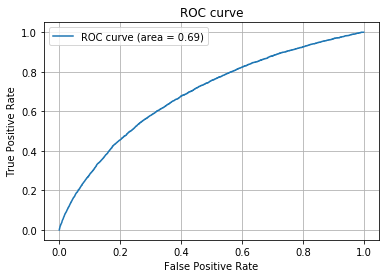

In [12]:
#ROC曲線とAUCによる評価
from sklearn import metrics

fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [13]:
print("AUC=", auc)

AUC= 0.6876494011052172


## 【問題3】テストデータに対する推定

In [14]:
df_test = pd.read_csv("../home-credit-default-risk/application_test.csv")

In [15]:
df_test.shape

(48744, 121)

In [16]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rawdata = df_test.loc[: ,["SK_ID_CURR", "EXT_SOURCE_3", "DAYS_BIRTH"]]
Xa_test_origin = rawdata.dropna(how = "any")
Xa_test_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40076 entries, 0 to 48743
Data columns (total 3 columns):
SK_ID_CURR      40076 non-null int64
EXT_SOURCE_3    40076 non-null float64
DAYS_BIRTH      40076 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [18]:
SK_ID_CURR_Dropped = Xa_test_origin["SK_ID_CURR"]

In [19]:
Xa_test = Xa_test_origin.drop("SK_ID_CURR" , axis = 1)

In [20]:
SK_ID_CURR_Dropped.head()

0    100001
1    100005
2    100013
3    100028
5    100042
Name: SK_ID_CURR, dtype: int64

In [21]:
Xa_test.head()

,EXT_SOURCE_3,DAYS_BIRTH
0,0.159520,-19241
1,0.432962,-18064
2,0.610991,-20038
3,0.612704,-13976
5,0.392774,-18604


In [22]:
#標準化処理

from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
sc_test.fit(Xa_test)
Xa_test_std = sc_test.transform(Xa_test)

In [23]:
#【問題２】で学習したモデルをテストデータに適用
y_test_pred = lr.predict(Xa_test_std)
y_test_pred.shape

(40076,)

In [24]:
#提出データ作成のために一度DF化
SK_ID_CURR_Dropped = pd.DataFrame(data = SK_ID_CURR_Dropped)
y_test_pred = pd.DataFrame(data = y_test_pred)

subfile = SK_ID_CURR_Dropped.join( y_test_pred)

＜不明現象＞

DataFrameの結合のところで、下記のようにconcatを使用すると、IDカラムの所々に謎の空行が挿入されてしまう。

#sample = pd.concat([SK_ID_CURR_Dropped , y_test_pred] , axis = 1)

concatの独自処理なのか、軽く調べてみたところ同様の現象は発見できなかった

In [25]:
subfile.to_csv("subfile.csv" )

## 【問題4】特徴量エンジニアリング


【問題２】である程度精度が出たと判断し、試しに特徴量を加えて同様の処理をしてAUCがどう変わるか見てみる。
加える特徴量は、相関が比較的高い「EXT_SOURCE_1」と「EXT_SOURCE_2」である。

In [74]:
rawdata_b = df.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "TARGET"]]
rawdata_b.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.083037,0.262949,0.139376,-9461,1
1,0.311267,0.622246,NaN,-16765,0
2,NaN,0.555912,0.729567,-19046,0
3,NaN,0.650442,NaN,-19005,0
4,NaN,0.322738,NaN,-19932,0


In [75]:
#欠損値処理
Xb = rawdata_b.dropna(how = "any")
Xb.shape

(109589, 5)

In [76]:
#分割
y = Xb.loc[: , "TARGET"]
Xb = Xb.iloc[: , :4]

In [77]:
#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xb , y , test_size = 0.25 , random_state = 0)

In [78]:
#標準化
sc_b = StandardScaler()
sc_b.fit(X_train)
X_b_std = sc_b.transform(X_train)
X_test = sc_b.transform(X_test)

In [79]:
#学習

lr_b = LinearRegression()
lr_b.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
#推定
y_test_pred = lr_b.predict(X_test)
y_train_pred = lr_b.predict(X_train)

AUC= 0.7396674850107428


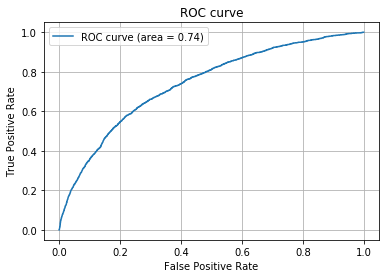

In [81]:
#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

特徴量を加えたことで、AUCの値が上がったことが分かる。では、さらに特徴量を増やすとどうなるか。

REGION_RATING_CLIENT_W_CITYとREGION_RATING_CLIENTを加えてみる。

In [82]:
rawdata_c = df.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT", "TARGET"]]
rawdata_c.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,2,2,1
1,0.311267,0.622246,NaN,-16765,1,1,0
2,NaN,0.555912,0.729567,-19046,2,2,0
3,NaN,0.650442,NaN,-19005,2,2,0
4,NaN,0.322738,NaN,-19932,2,2,0


In [83]:
#欠損値処理
Xc = rawdata_c.dropna(how = "any")
Xc.shape

(109589, 7)

AUC= 0.7401943332024297


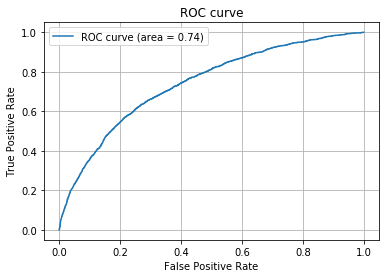

In [84]:
#分割
y = Xc.loc[: , "TARGET"]
Xc = Xc.iloc[: , :6]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xc , y , test_size = 0.25 , random_state = 0)

#標準化
sc_c = StandardScaler()
sc_c.fit(X_train)
X_c_std = sc_c.transform(X_train)
X_test = sc_c.transform(X_test)

#学習
lr_c = LinearRegression()
lr_c.fit(X_train , y_train)

#推定
y_test_pred = lr_c.predict(X_test)
y_train_pred = lr_c.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

AUC値はさらに上がったが、上がり方が鈍くなってきたことが分かる。

### ◇属性の組み合わせを試してみる（特徴量の創出）

ここで、いくつか属性を結合してみて、より相関の高い新しい特徴量を創出してみたい。

注目は、TARGETと相関の高かったREG_CITY_NOT_WORK_CITYとREG_CITY_NOT_LIVE_CITYである。

それぞれ、
 - REG_CITY_NOT_WORK_CITY：居住地と勤務地が地域レベルで異なる住所の場合、フラグ１
 - REG_CITY_NOT_LIVE_CITY：居住地と連絡先住所が地域レベルで異なる場合、フラグ１
 
 というデータであり、これを単純に足し合わせてREG_CITY_LEVEL（value = [0,1,2]）という特徴量を作る。


In [89]:
df["REG_CITY_LEVEL"] = df["REG_CITY_NOT_WORK_CITY"] + df["REG_CITY_NOT_LIVE_CITY"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(df.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

「REG_CITY_NOT_WORK_CITY」と「REG_CITY_NOT_LIVE_CITY」より相関が高い**「REG_CITY_LEVEL」**が新たに作成されたことが分かる。

同じ考え方で、「REGION_RATING_CLIENT_W_CITY」と「REGION_RATING_CLIENT」を足し合わせた「SUM_REGION_RATING」も作成する。

In [90]:
df["SUM_REGION_RATING"] = df["REGION_RATING_CLIENT_W_CITY"] + df["REGION_RATING_CLIENT"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(df.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
SUM_REGION_RATING              0.060639
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

おや、今度は新特徴量が生成前の２特徴量より高くならなかった。なぜだろう。単純に足し合わせただけではREGION_RATING_CLIENT_W_CITYの方がTARGETと相関が高い。つまり、より相関の低いREGION_RATING_CLIENT側に新特徴量が引っ張られてしまったからであろう。

では、「足す」のではなく、「掛け」てみたらどうなるだろう。

In [91]:
df["SUM_REGION_RATING"] = df["REGION_RATING_CLIENT_W_CITY"] * df["REGION_RATING_CLIENT"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(df.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
SUM_REGION_RATING              0.060179
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

やや、足し合わせた時よりも、さらに相関が低くなってしまった。より負の傾向が増幅されてしまった形となる。

そこで、先ほどの**REG_CITY_LEVEL**と**REGION_RATING_CLIENT_W_CITY**を掛け合わせた**「CITY_RATING_LEVEL」**を作ってみよう。

In [92]:
df["CITY_RATING_LEVEL"] = df["REGION_RATING_CLIENT_W_CITY"] * df["REG_CITY_LEVEL"]

#改めてターゲットとの相関が高い特徴量を調べる
df_s = np.abs(df.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
CITY_RATING_LEVEL              0.064078
REGION_RATING_CLIENT_W_CITY    0.060893
SUM_REGION_RATING              0.060179
REGION_RATING_CLIENT           0.058899
REG_CITY_LEVEL                 0.056526
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
Name: TARGET, dtype: float64

めでたく、DAYS_BIRTHの次に相関の高い**CITY_RATING_LEVEL**が誕生した。

この値を使ってもう一度モデルを検証してみよう。

なお、「REGION_RATING_CLIENT」は「CITY_RATING_LEVEL」の創出には使われていないので、この値も使用してOKのはずだ。

In [93]:
rawdata_d = df.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "CITY_RATING_LEVEL", "REGION_RATING_CLIENT", "TARGET"]]
rawdata_d.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CITY_RATING_LEVEL,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,0,2,1
1,0.311267,0.622246,NaN,-16765,0,1,0
2,NaN,0.555912,0.729567,-19046,0,2,0
3,NaN,0.650442,NaN,-19005,0,2,0
4,NaN,0.322738,NaN,-19932,2,2,0


In [94]:
#欠損値処理
Xd = rawdata_d.dropna(how = "any")
Xd.shape

(109589, 7)

AUC= 0.7399542189791549


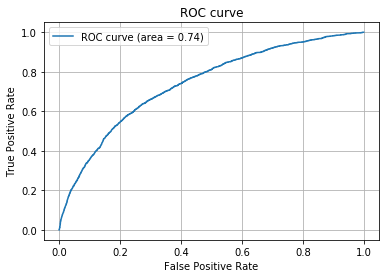

In [95]:
#分割
y = Xd.loc[: , "TARGET"]
Xd = Xd.iloc[: , :6]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xd , y , test_size = 0.25 , random_state = 0)

#標準化
sc_d = StandardScaler()
sc_d.fit(X_train)
X_d_std = sc_d.transform(X_train)
X_test = sc_d.transform(X_test)

#学習
lr_d = LinearRegression()
lr_d.fit(X_train , y_train)

#推定
y_test_pred = lr_d.predict(X_test)
y_train_pred = lr_d.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

逆にスコアが低くなってしまった。

REGION_RATING_CLIENT_W_CITYを抜いてしまったからだろうか。

REGION_RATING_CLIENT_W_CITYを加えてもう一度試してみる。

In [96]:
rawdata_e = df.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "CITY_RATING_LEVEL", "REGION_RATING_CLIENT_W_CITY",
                        "REGION_RATING_CLIENT", "TARGET"]]
rawdata_e.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CITY_RATING_LEVEL,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,0,2,2,1
1,0.311267,0.622246,NaN,-16765,0,1,1,0
2,NaN,0.555912,0.729567,-19046,0,2,2,0
3,NaN,0.650442,NaN,-19005,0,2,2,0
4,NaN,0.322738,NaN,-19932,2,2,2,0


In [98]:
#欠損値処理
Xe = rawdata_e.dropna(how = "any")
Xe.shape

(109589, 8)

AUC= 0.7401872589157568


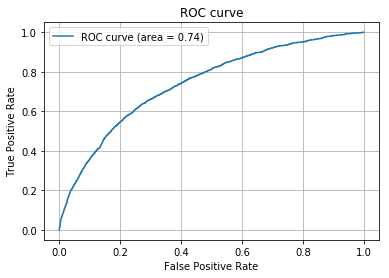

In [99]:
#分割
y = Xe.loc[: , "TARGET"]
Xe = Xe.iloc[: , :7]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xe , y , test_size = 0.25 , random_state = 0)

#標準化
sc_e = StandardScaler()
sc_e.fit(X_train)
X_e_std = sc_e.transform(X_train)
X_test = sc_e.transform(X_test)

#学習
lr_e = LinearRegression()
lr_e.fit(X_train , y_train)

#推定
y_test_pred = lr_e.predict(X_test)
y_train_pred = lr_e.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

残念ながら、新しい特徴量は役に立たなかったようだ。（なぜだ？！）

#### ◇欠損値補完

ここで、視点を変えてみよう。

これまで、データセットに対して欠損値のあるサンプルを削除するという方法でモデルを検証してきた。

これを、欠損値を補完することで精度が上がらないか試してみる。

In [100]:
rawdata_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
EXT_SOURCE_1                   134133 non-null float64
EXT_SOURCE_2                   306851 non-null float64
EXT_SOURCE_3                   246546 non-null float64
DAYS_BIRTH                     307511 non-null int64
CITY_RATING_LEVEL              307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
REGION_RATING_CLIENT           307511 non-null int64
TARGET                         307511 non-null int64
dtypes: float64(3), int64(5)
memory usage: 18.8 MB


EXT_SOURCE_1〜3のデータに欠損値が確認できるので、これらの欠損値を中央値で補完する。

In [105]:
#中央値の生成
median1 = rawdata_e["EXT_SOURCE_1"].median()
median2 = rawdata_e["EXT_SOURCE_2"].median()
median3 = rawdata_e["EXT_SOURCE_3"].median()

print("EXT_SOURCE_1の中央値：{}".format(median1))
print("EXT_SOURCE_2の中央値：{}".format(median2))
print("EXT_SOURCE_3の中央値：{}".format(median3))
print("---------------------------------------------------------------")

#DataFrameのコピー
rawdata_f = rawdata_e.copy()

#中央値で補完
rawdata_f["EXT_SOURCE_1"].fillna(median1, inplace=True)
rawdata_f["EXT_SOURCE_2"].fillna(median2, inplace=True)
rawdata_f["EXT_SOURCE_3"].fillna(median3, inplace=True)

###なお、scikit-learnのImputerクラスでも同様のことが可能

print(rawdata_f.info())
print("---------------------------------------------------------------")
print(rawdata_f.head(15))

EXT_SOURCE_1の中央値：0.5059979305057544
EXT_SOURCE_2の中央値：0.5659614260608526
EXT_SOURCE_3の中央値：0.5352762504724826
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
EXT_SOURCE_1                   307511 non-null float64
EXT_SOURCE_2                   307511 non-null float64
EXT_SOURCE_3                   307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
CITY_RATING_LEVEL              307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
REGION_RATING_CLIENT           307511 non-null int64
TARGET                         307511 non-null int64
dtypes: float64(3), int64(5)
memory usage: 18.8 MB
None
---------------------------------------------------------------
    EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  CITY_RATING_LEVEL  \
0       0.083037      0.262949      0.139376       -9461                  0   
1       0.

無事、欠損値を埋められたので、このDFで検証を行ってみる。

In [107]:
#DFの参照
Xf = rawdata_f
Xf.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,CITY_RATING_LEVEL,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,0.083037,0.262949,0.139376,-9461,0,2,2,1
1,0.311267,0.622246,0.535276,-16765,0,1,1,0
2,0.505998,0.555912,0.729567,-19046,0,2,2,0
3,0.505998,0.650442,0.535276,-19005,0,2,2,0
4,0.505998,0.322738,0.535276,-19932,2,2,2,0


AUC= 0.7171520852140917


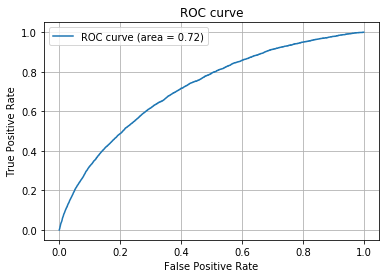

In [108]:
#分割
y = Xf.loc[: , "TARGET"]
Xf = Xf.iloc[: , :7]

#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xf , y , test_size = 0.25 , random_state = 0)

#標準化
sc_f = StandardScaler()
sc_f.fit(X_train)
X_f_std = sc_f.transform(X_train)
X_test = sc_f.transform(X_test)

#学習
lr_f = LinearRegression()
lr_f.fit(X_train , y_train)

#推定
y_test_pred = lr_f.predict(X_test)
y_train_pred = lr_f.predict(X_train)

#評価
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)

#可視化
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

サンプル数が増えた分、スコアが下がってしまった！！

が、信頼性は上がっていると考えられるので、実際にはこちらの方が望ましいと考えられる。

### モデルの可視化

最後に、今まで作成したモデルの可視化を行ってみる。

今回は、LinearRegressionを使用したので、直線として表現できる。

In [119]:
#線形回帰の係数（coef）と切片（intercept）を比較
#係数はEXT_SOURCE_3

models = {"lr": [lr.coef_[0], lr.intercept_], "lr_b": [lr_b.coef_[2], lr_b.intercept_],
          "lr_c": [lr_c.coef_[2], lr_c.intercept_], "lr_d": [lr_d.coef_[2], lr_d.intercept_],
          "lr_e": [lr_e.coef_[2], lr_e.intercept_], "lr_f": [lr_f.coef_[2], lr_f.intercept_]
         }
df_models = pd.DataFrame(models, index=["coef", "intercept"])
df_models.head()

,lr,lr_b,lr_c,lr_d,lr_e,lr_f
coef,-0.045663,-0.194160,-0.194534,-0.193893,-0.193969,-0.207790
intercept,0.077919,0.280112,0.267559,0.265715,0.263829,0.343641


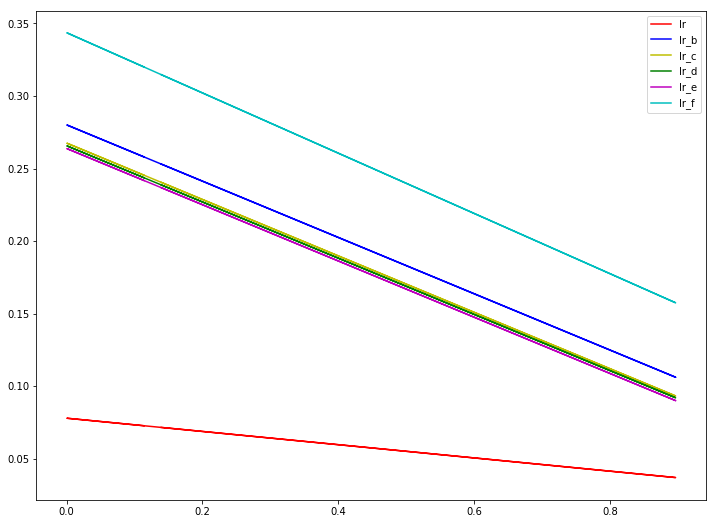

In [124]:
#EXT_SOURCE_3の特徴量に関してプロット

plt.figure(figsize=(12,9))
plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr.coef_[0] + lr.intercept_ , color="r", label = "lr")
plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_b.coef_[2] + lr_b.intercept_, color="b", label = "lr_b")
plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_c.coef_[2] + lr_c.intercept_ , color="y", label = "lr_c")
plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_d.coef_[2] + lr_d.intercept_, color="g", label = "lr_d")
plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_e.coef_[2] + lr_e.intercept_, color="m", label = "lr_e")
plt.plot(Xf["EXT_SOURCE_3"], Xf["EXT_SOURCE_3"]*lr_f.coef_[2] + lr_f.intercept_, color="c", label = "lr_f")
plt.legend()


以上